In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("data.csv", index_col=0)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.reset_index()

df['year'] = [int(str(time).split('-')[0]) for time in df.Timestamp.values]
df['month'] = [int(str(time).split('-')[1]) for time in df.Timestamp.values]

df.columns

Index(['index', 'Timestamp', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ',
       'ABSNJZH', 'SAVNCPP', 'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR',
       'SHRGT45', 'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH',
       'TOTFY', 'MEANJZD', 'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE',
       'CRVAL1', 'CRLN_OBS', 'CRLT_OBS', 'CRVAL2', 'HC_ANGLE', 'LAT_MIN',
       'LON_MIN', 'LAT_MAX', 'LON_MAX', 'XR_MAX', 'y', 'year', 'month'],
      dtype='object')

In [19]:
df_data = df[['TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH',
       'SAVNCPP', 'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45',
       'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY',
       'MEANJZD', 'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'CRVAL1',
       'CRLN_OBS', 'CRLT_OBS', 'CRVAL2', 'HC_ANGLE', 'LAT_MIN', 'LON_MIN',
       'LAT_MAX', 'LON_MAX', 'XR_MAX', 'y']]

df_data.corr()['y']

TOTUSJH     0.565418
TOTBSQ      0.527332
TOTPOT      0.137785
TOTUSJZ     0.559952
ABSNJZH     0.449720
SAVNCPP     0.468942
USFLUX      0.556764
TOTFZ      -0.529536
MEANPOT    -0.006125
EPSZ        0.459889
MEANSHR     0.473193
SHRGT45     0.486780
MEANGAM     0.419235
MEANGBT    -0.436099
MEANGBZ    -0.349740
MEANGBH    -0.013596
MEANJZH     0.014119
TOTFY      -0.116472
MEANJZD    -0.152130
MEANALP     0.026549
TOTFX       0.010837
EPSY        0.006812
EPSX       -0.015818
R_VALUE     0.648474
CRVAL1     -0.003014
CRLN_OBS    0.006083
CRLT_OBS    0.009549
CRVAL2     -0.033274
HC_ANGLE    0.306510
LAT_MIN    -0.102843
LON_MIN    -0.088230
LAT_MAX     0.043541
LON_MAX     0.052506
XR_MAX     -0.036833
y           1.000000
Name: y, dtype: float64

/tmp/ipykernel_6637/4033019463.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 5, figsize=(24, 4))


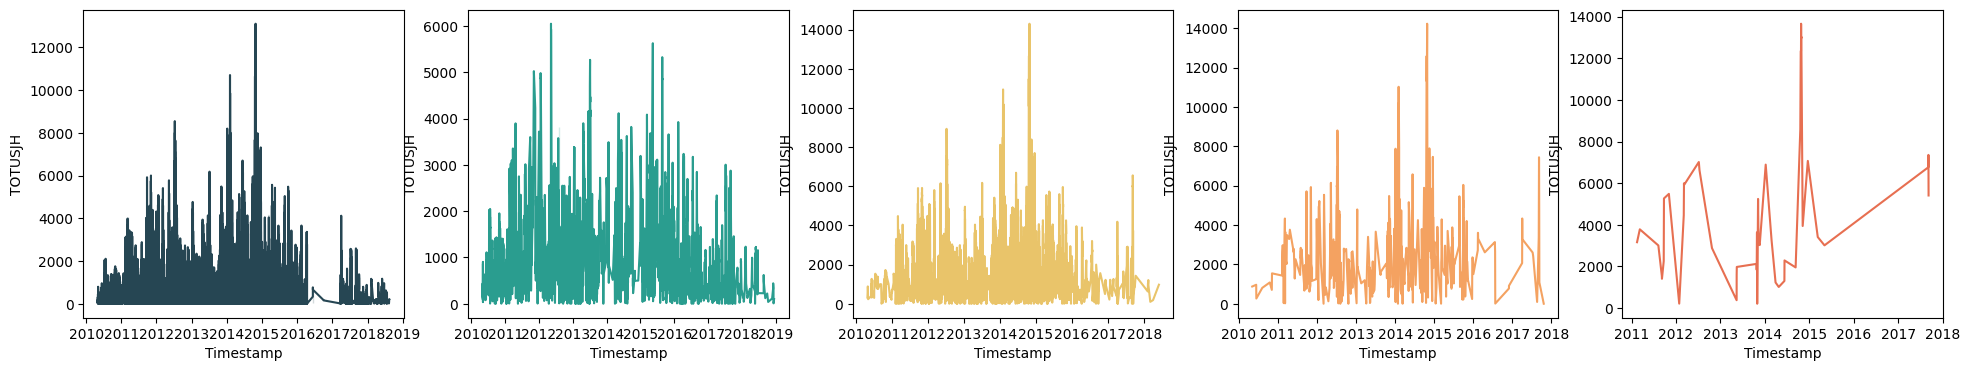

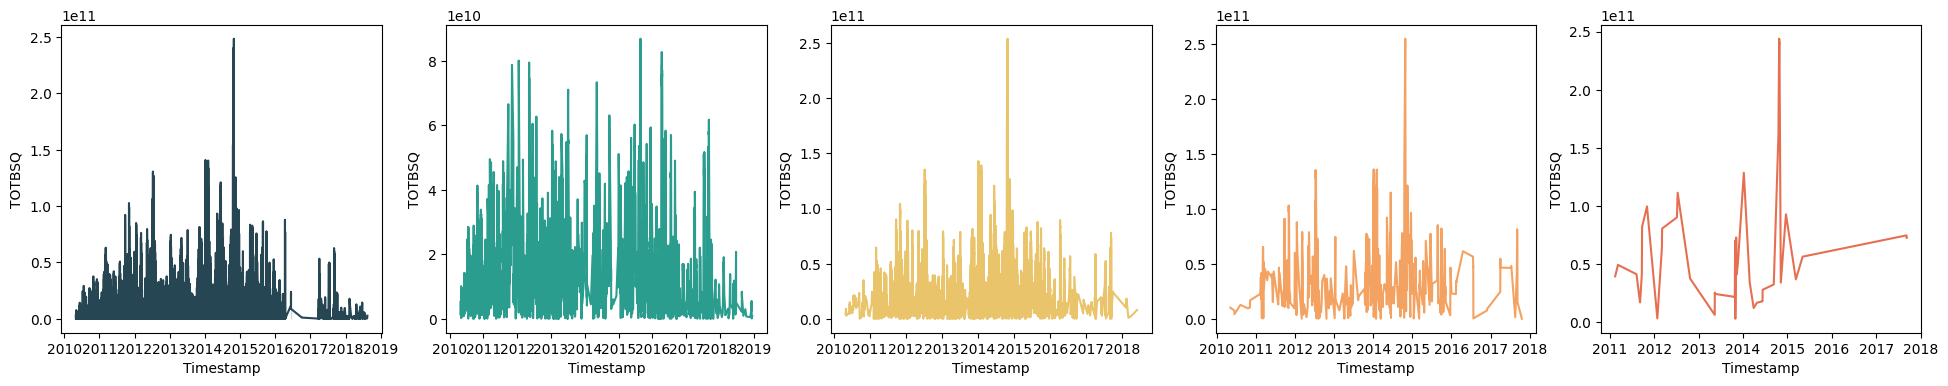

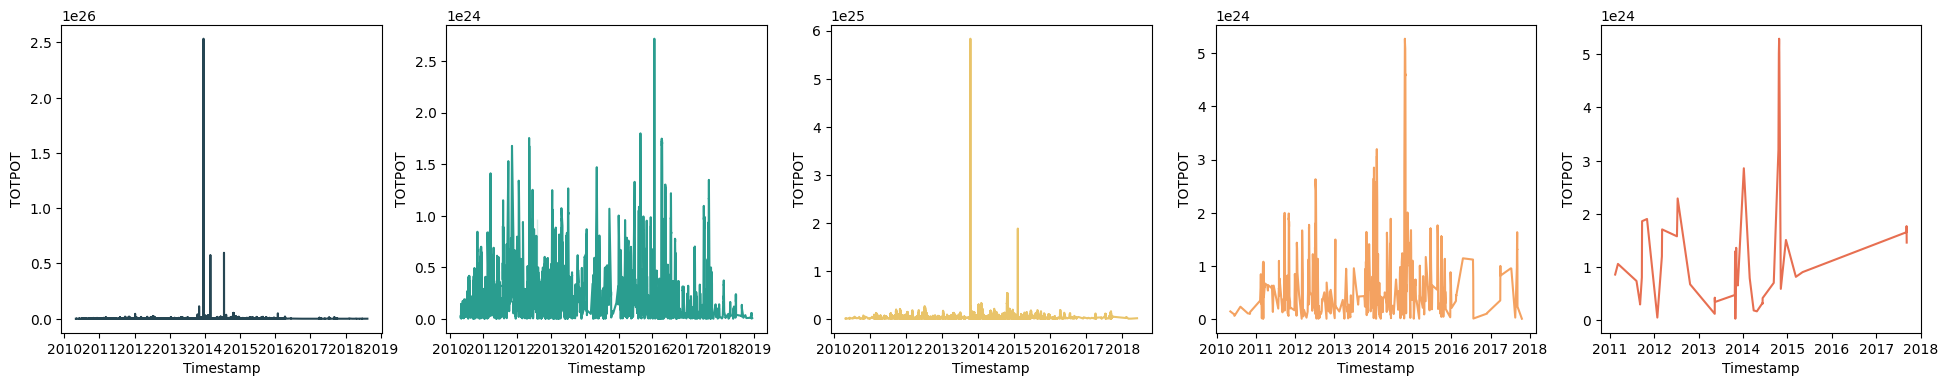

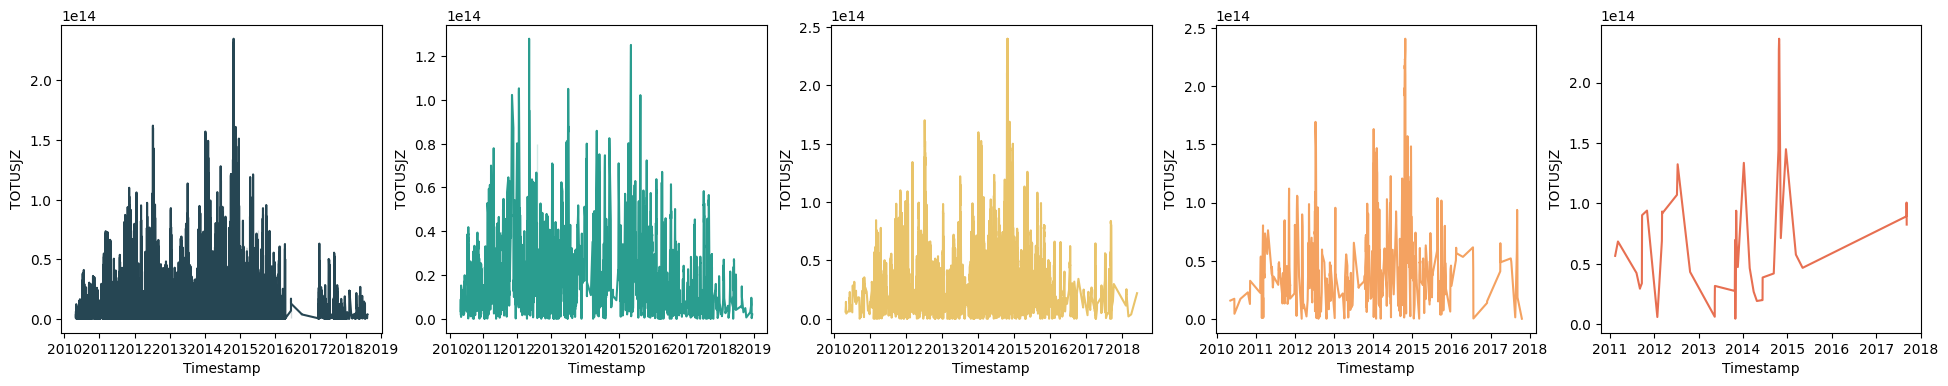

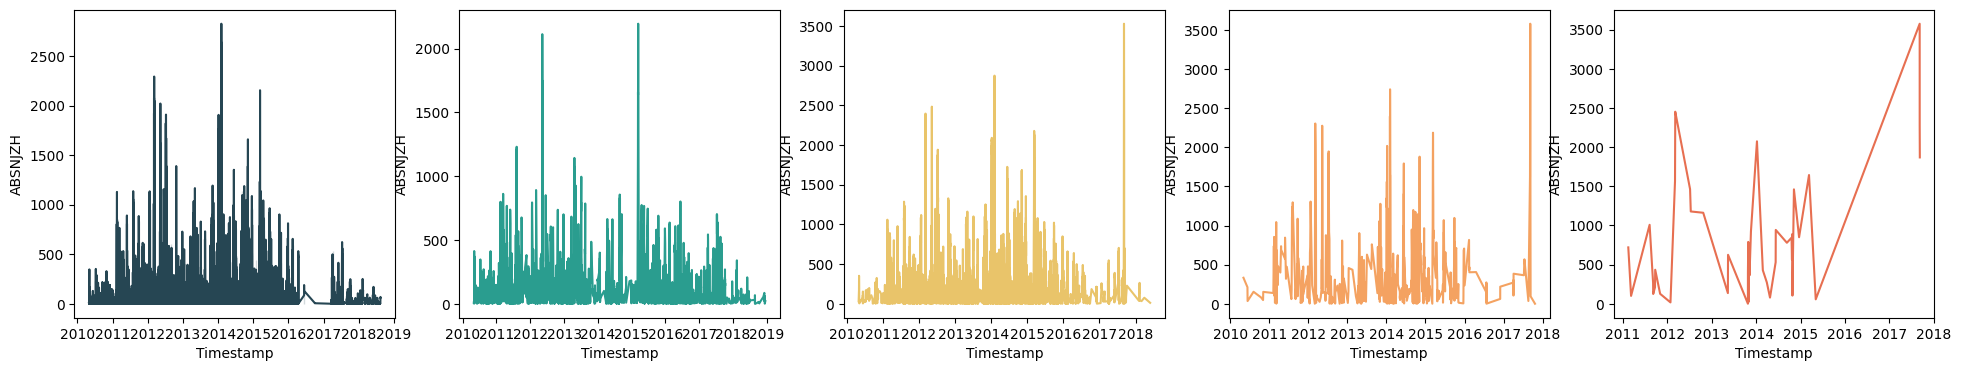

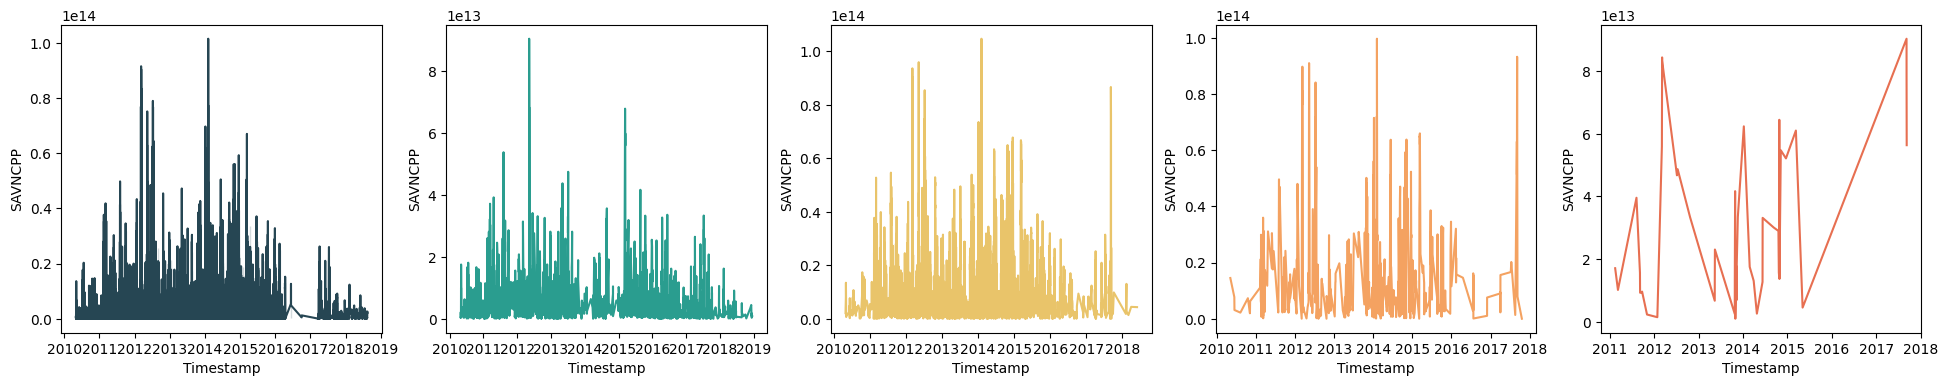

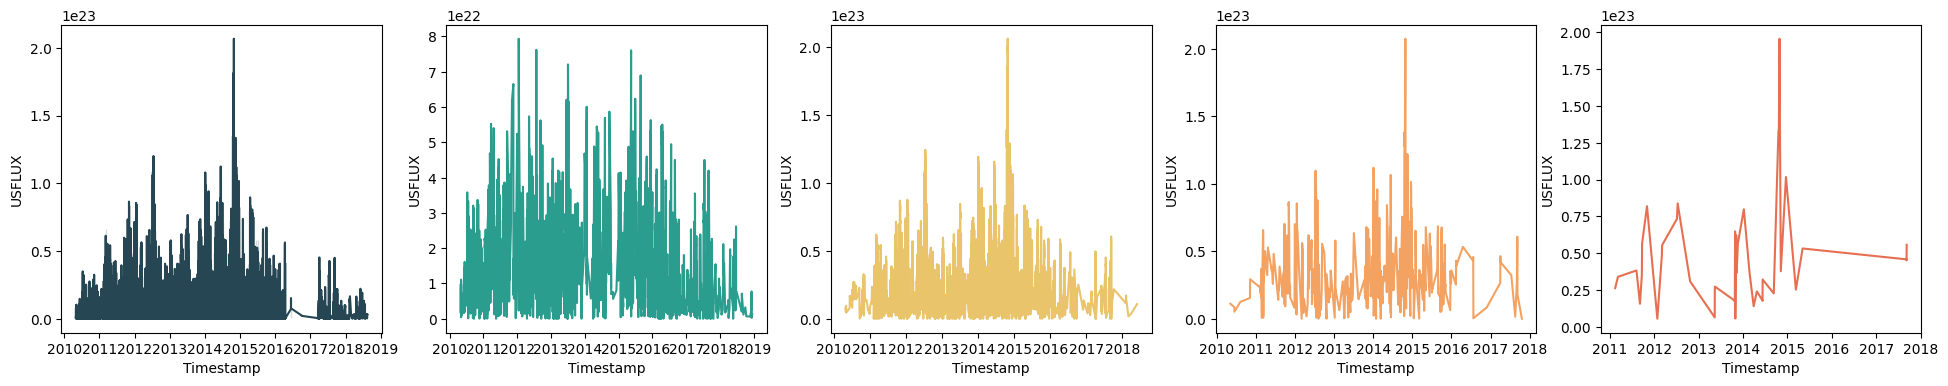

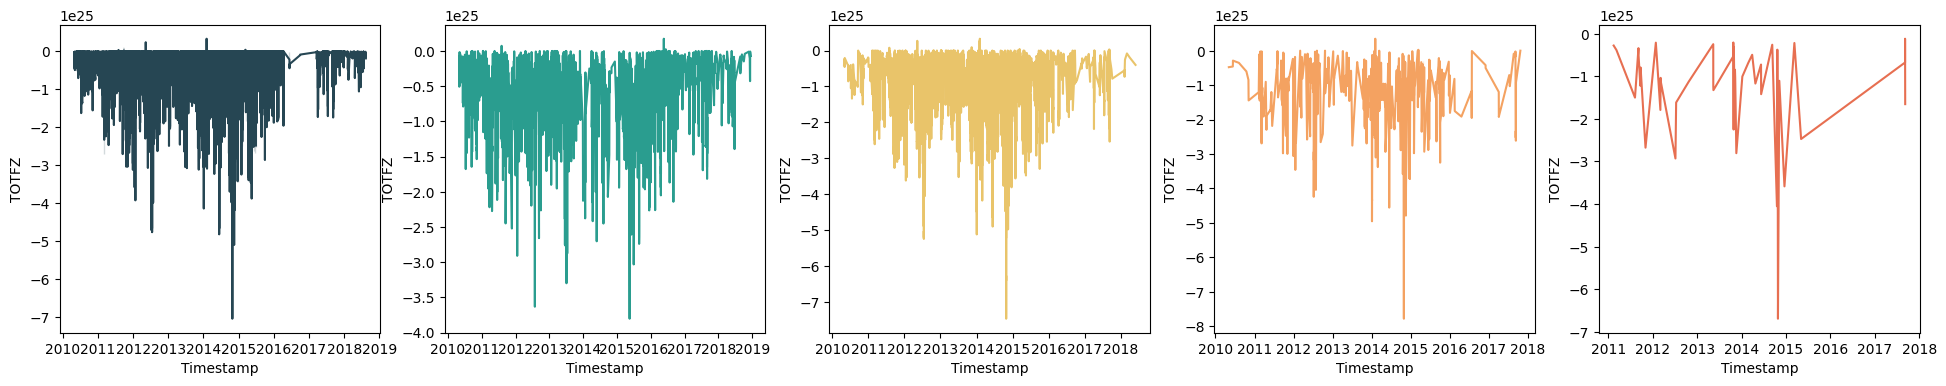

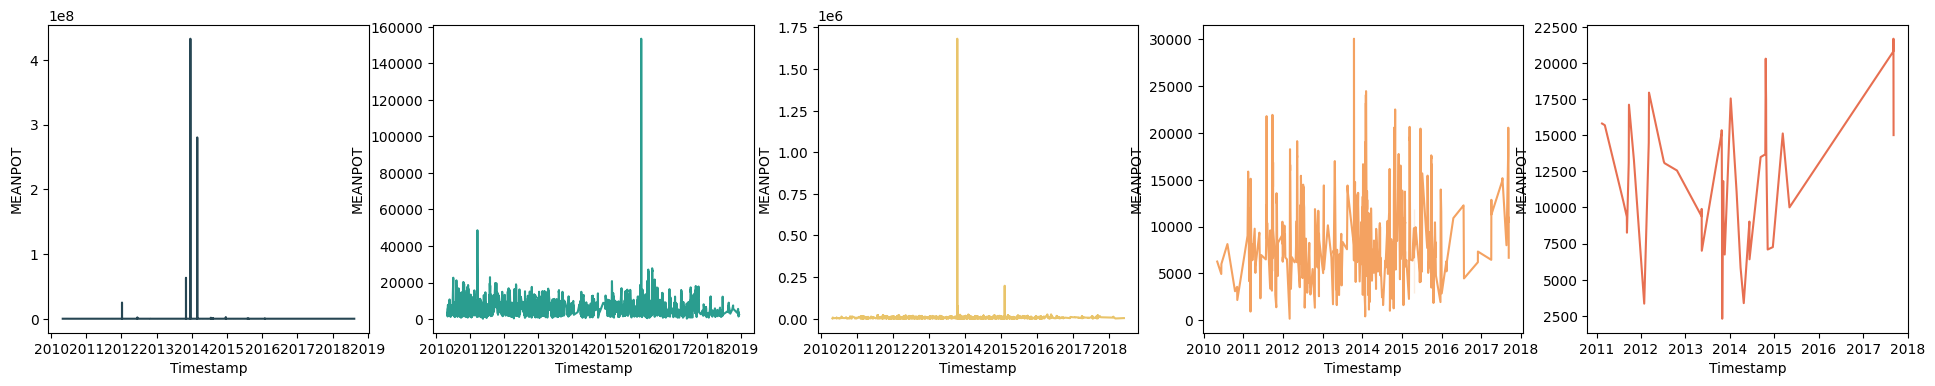

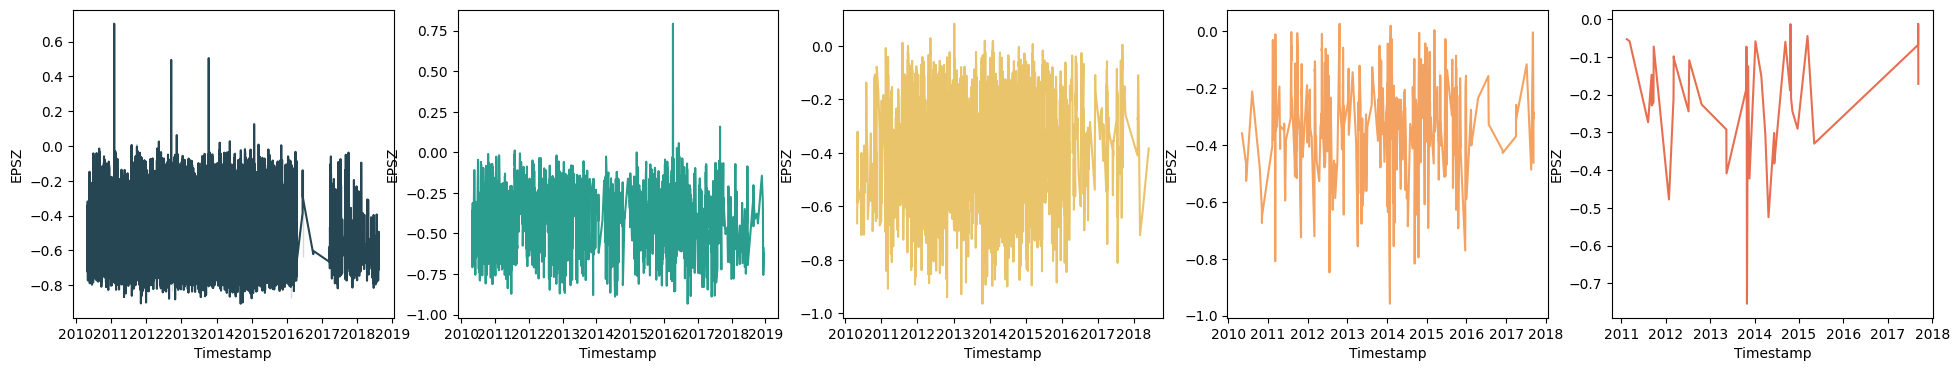

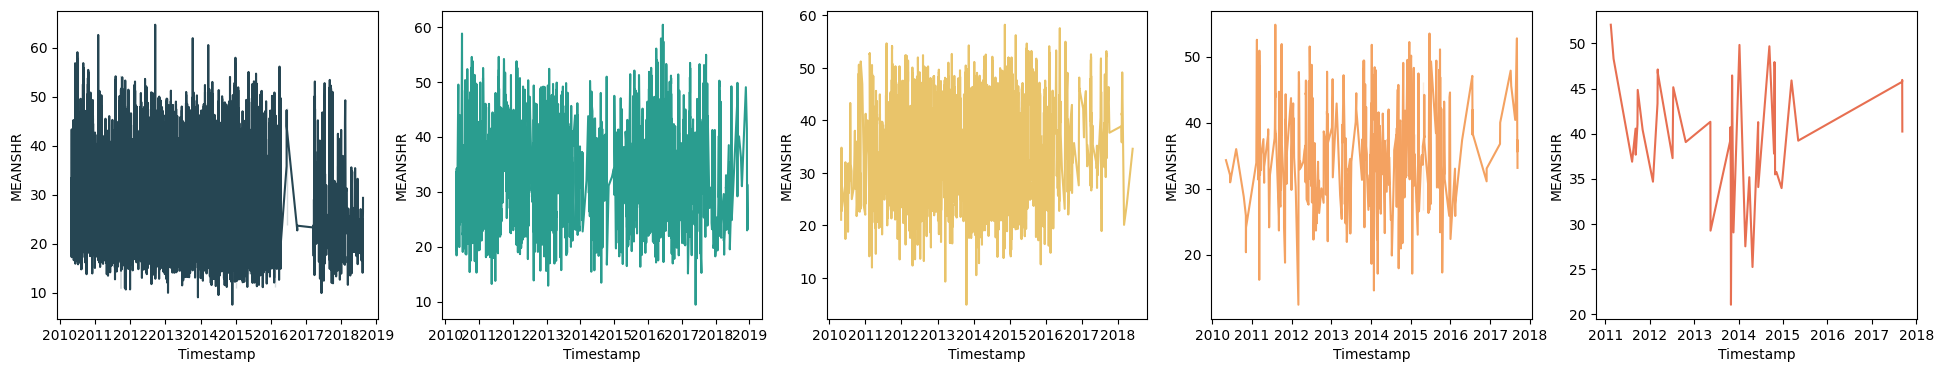

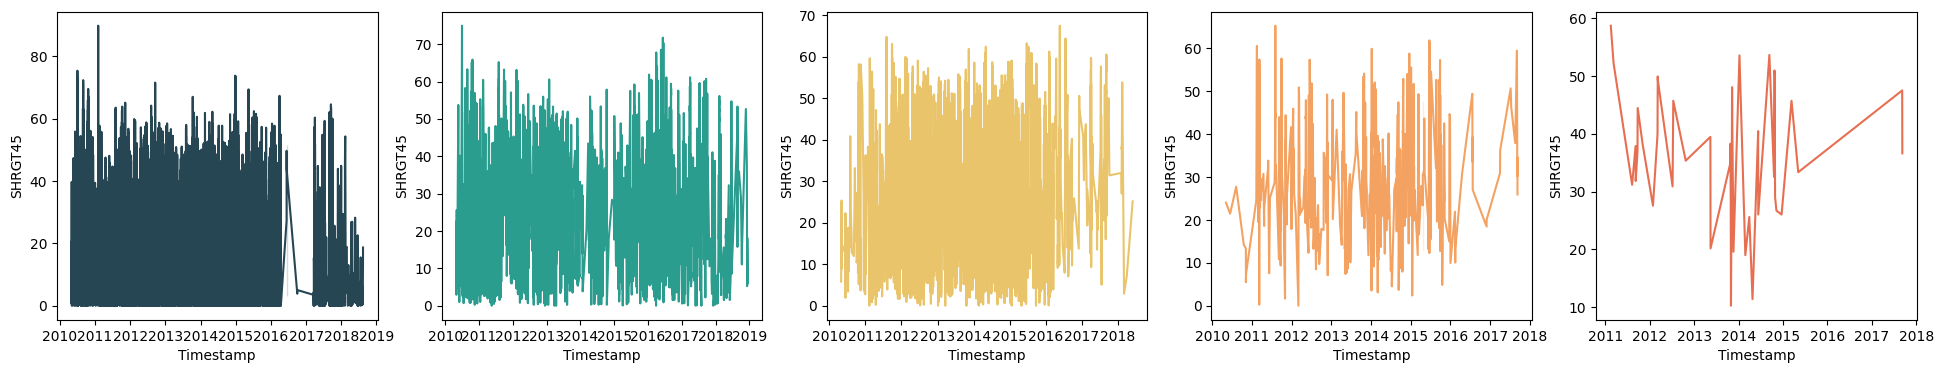

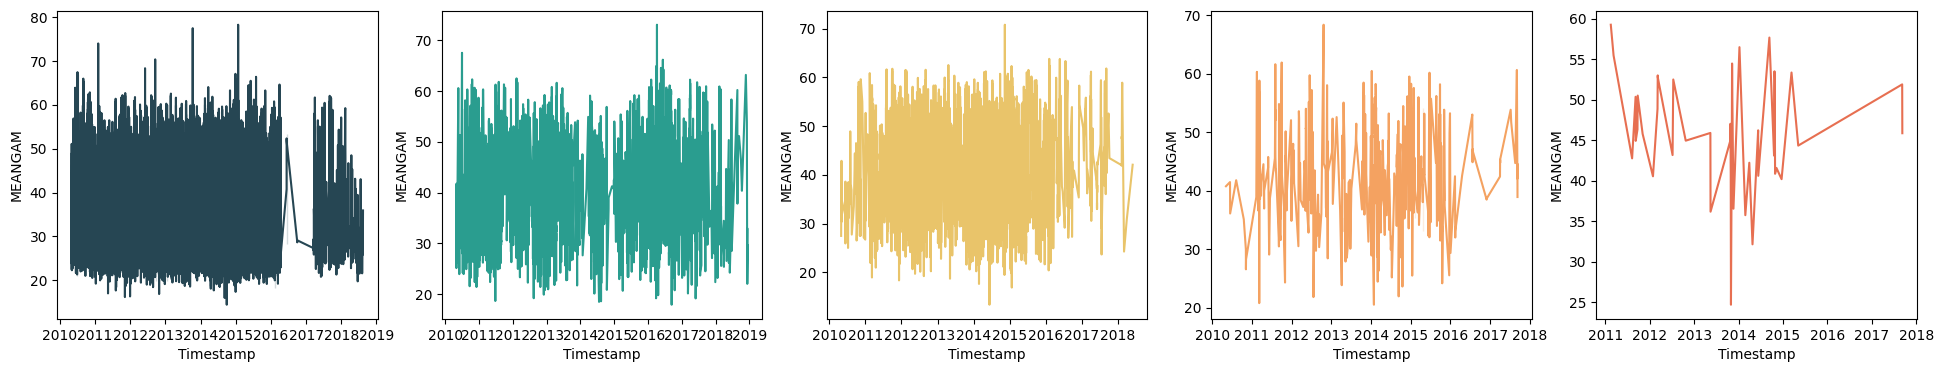

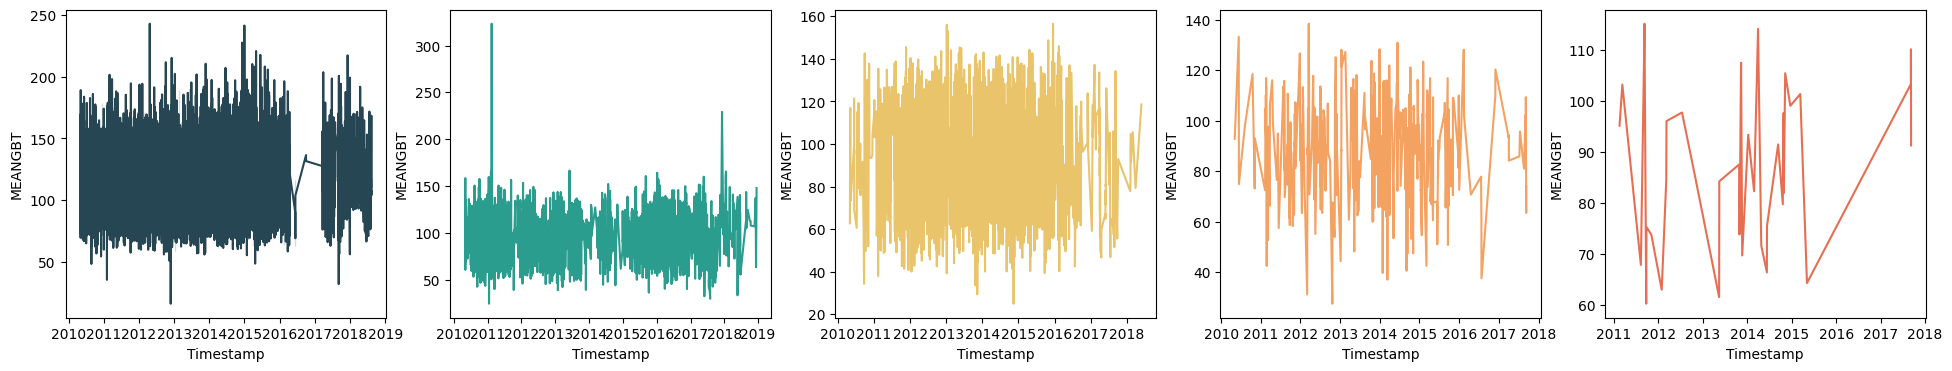

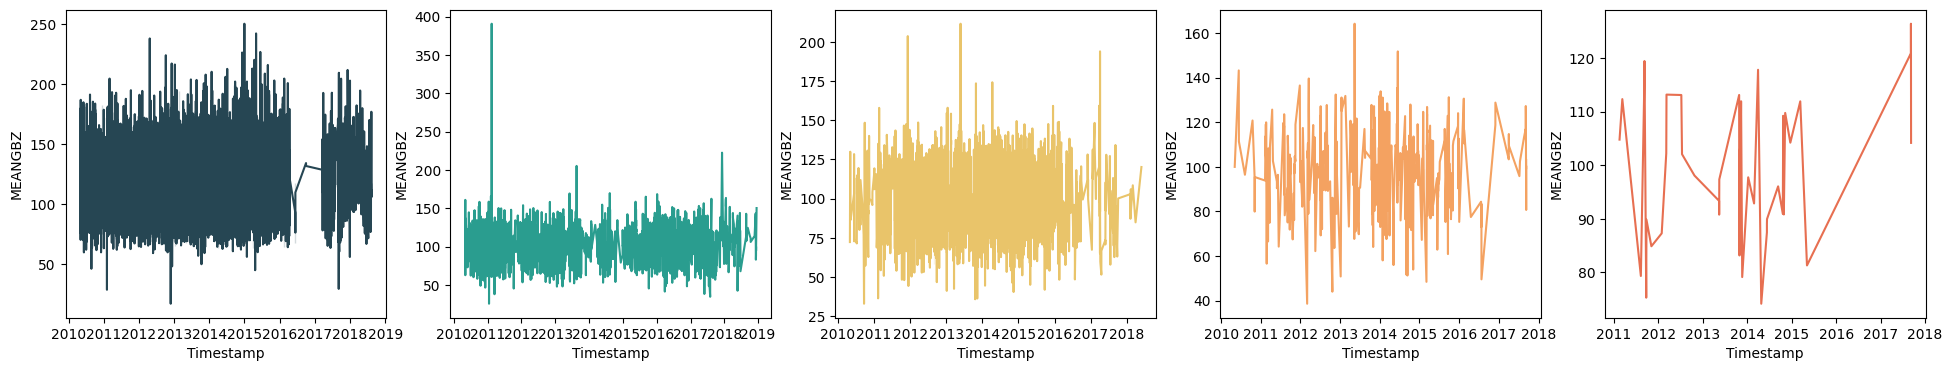

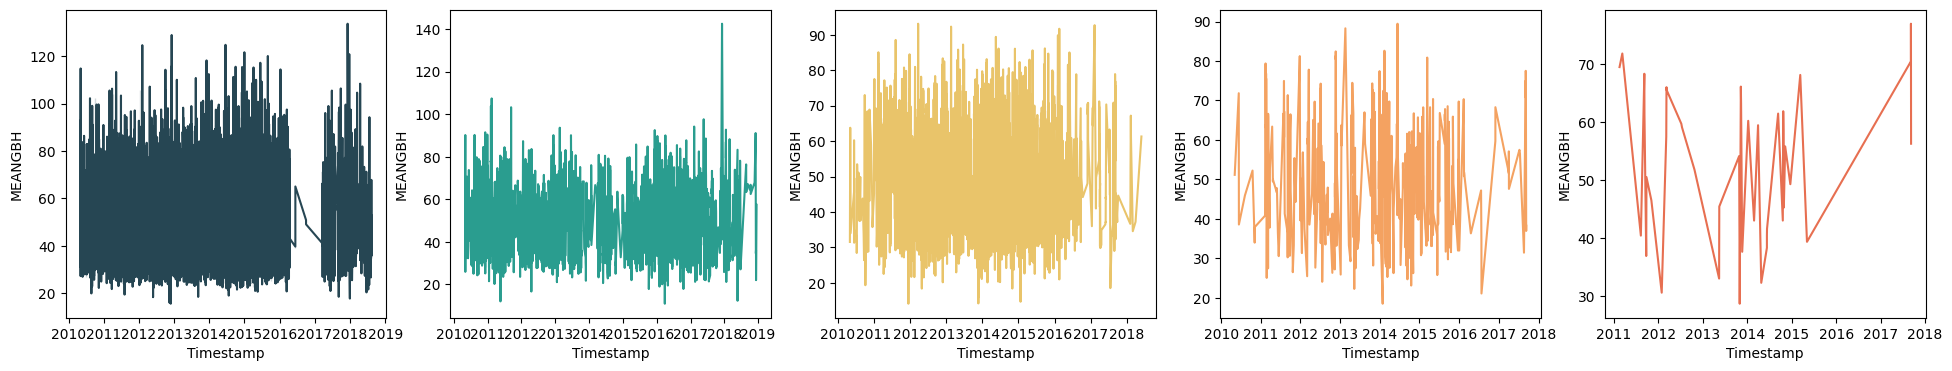

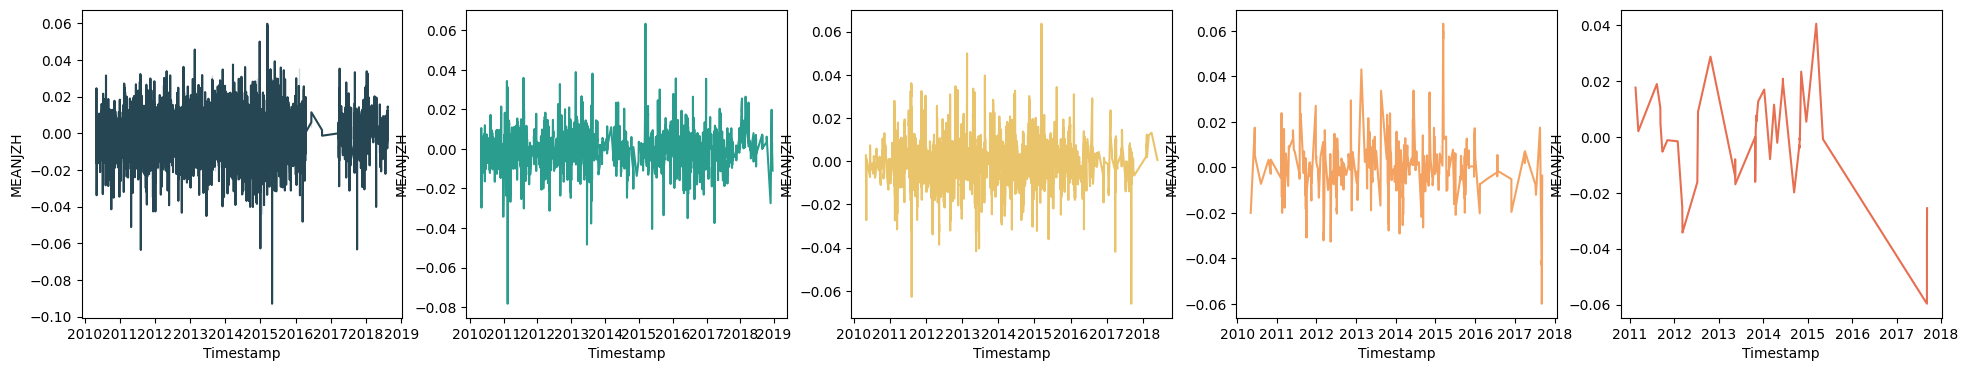

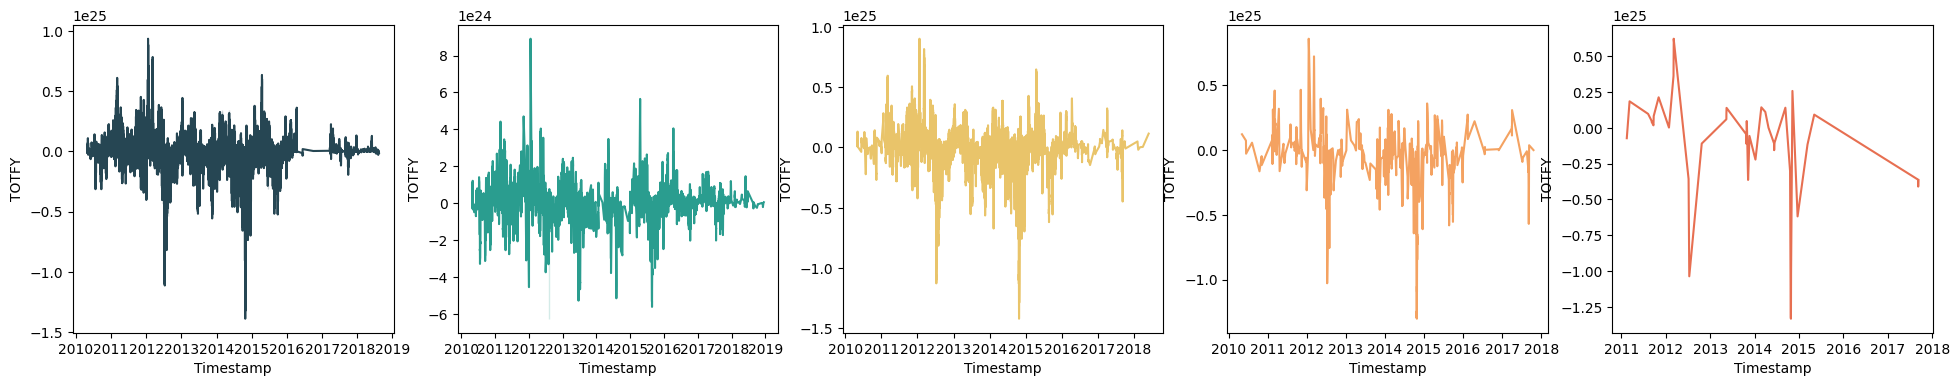

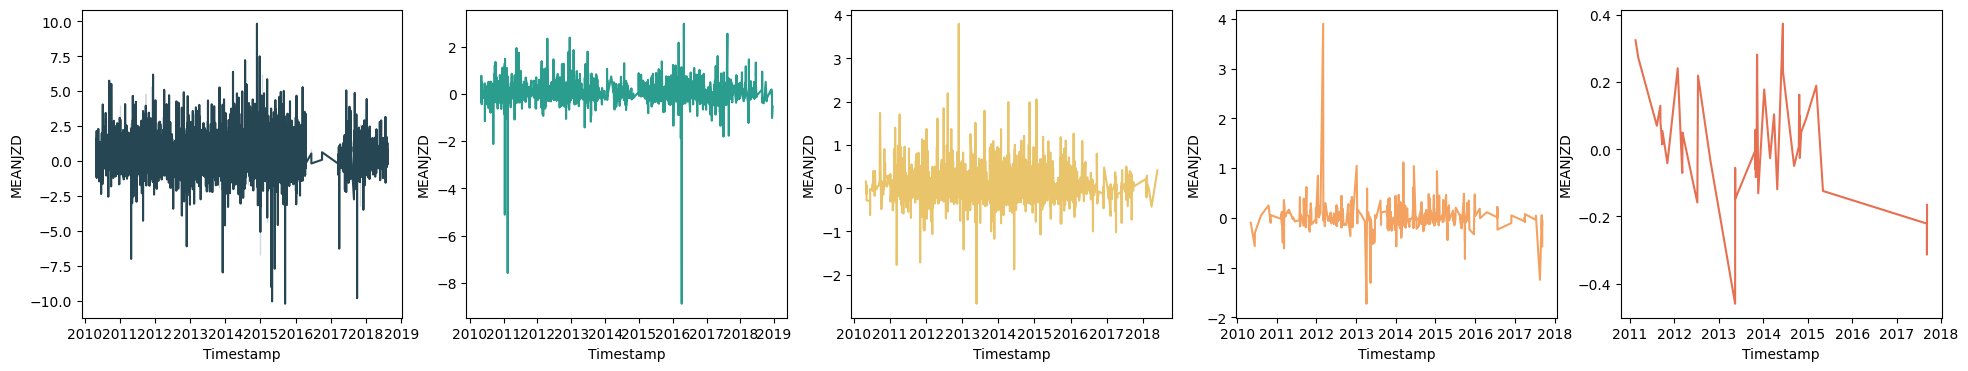

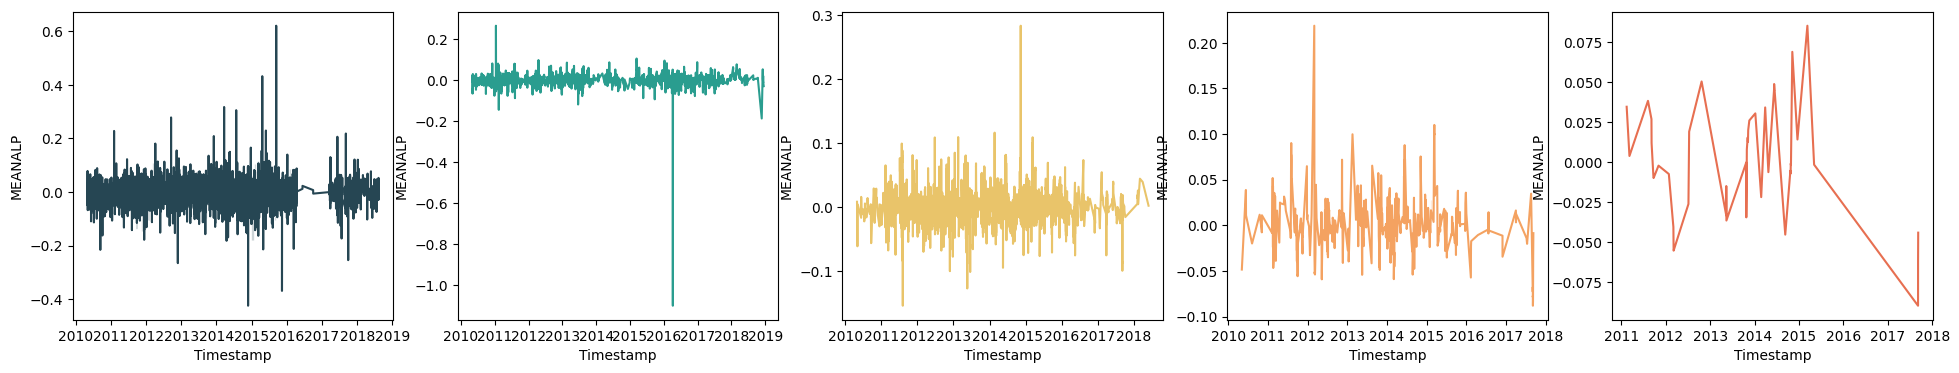

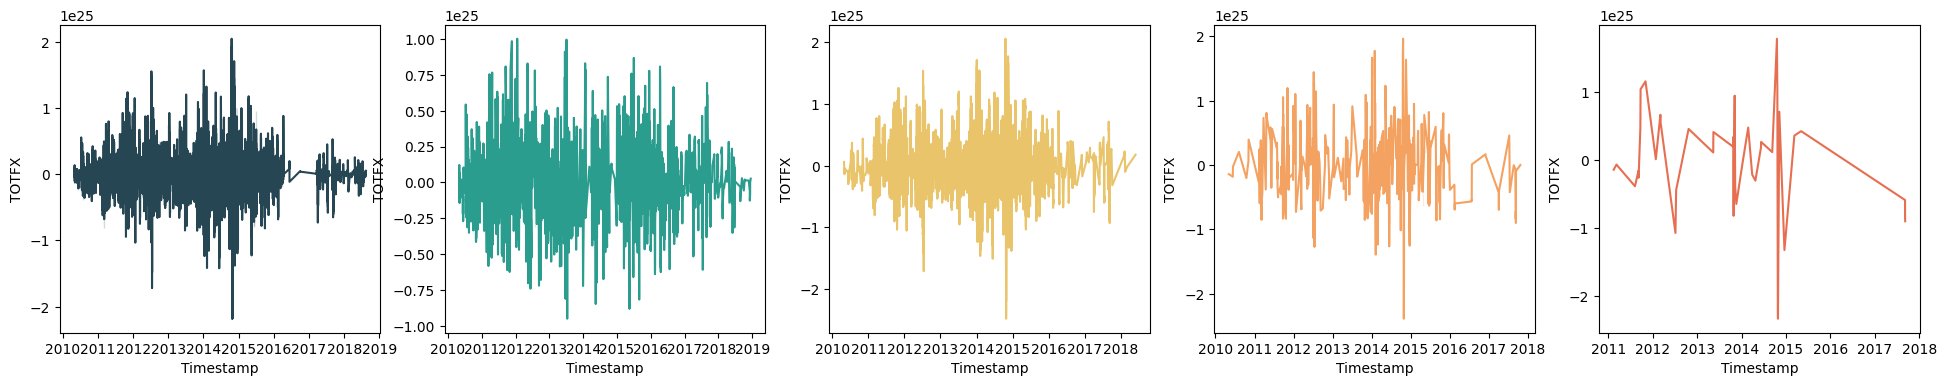

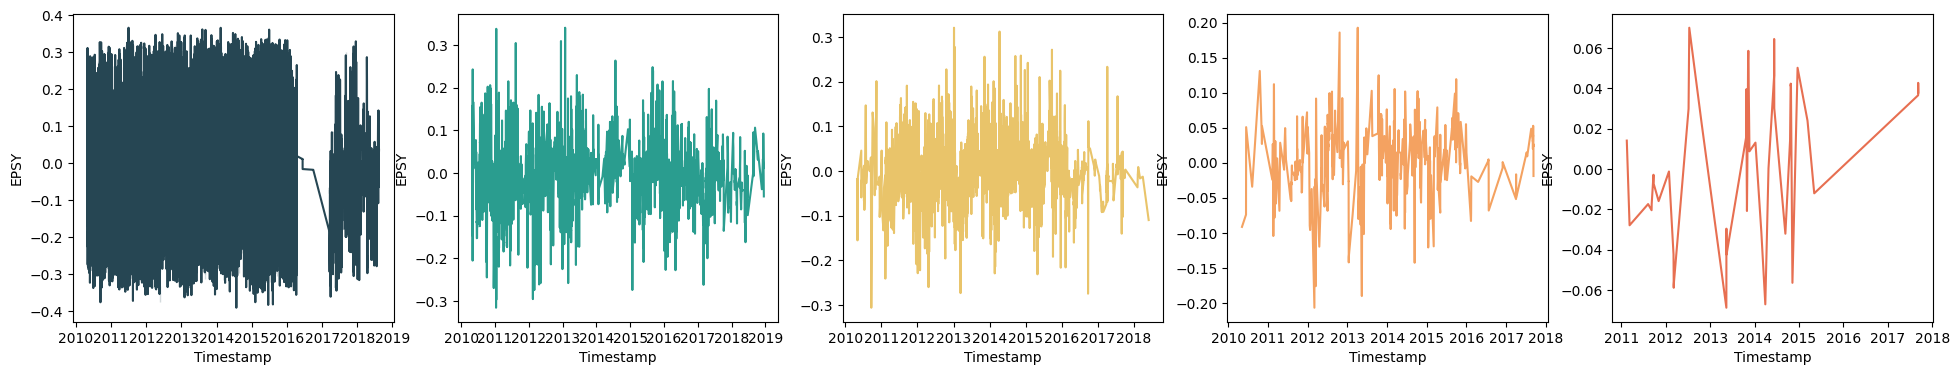

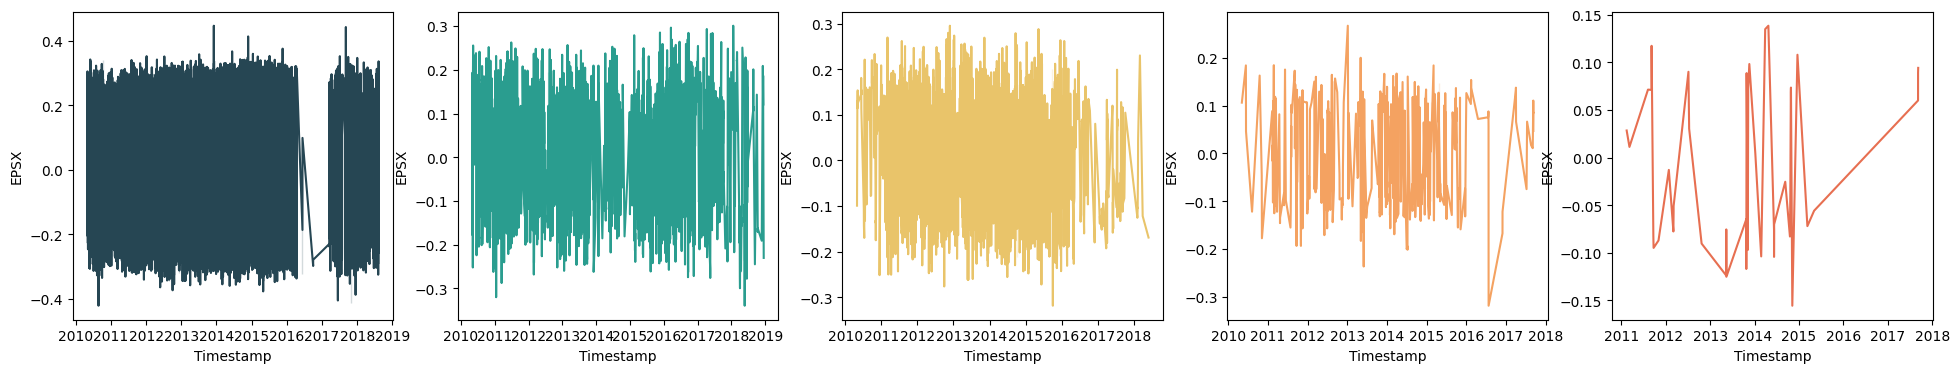

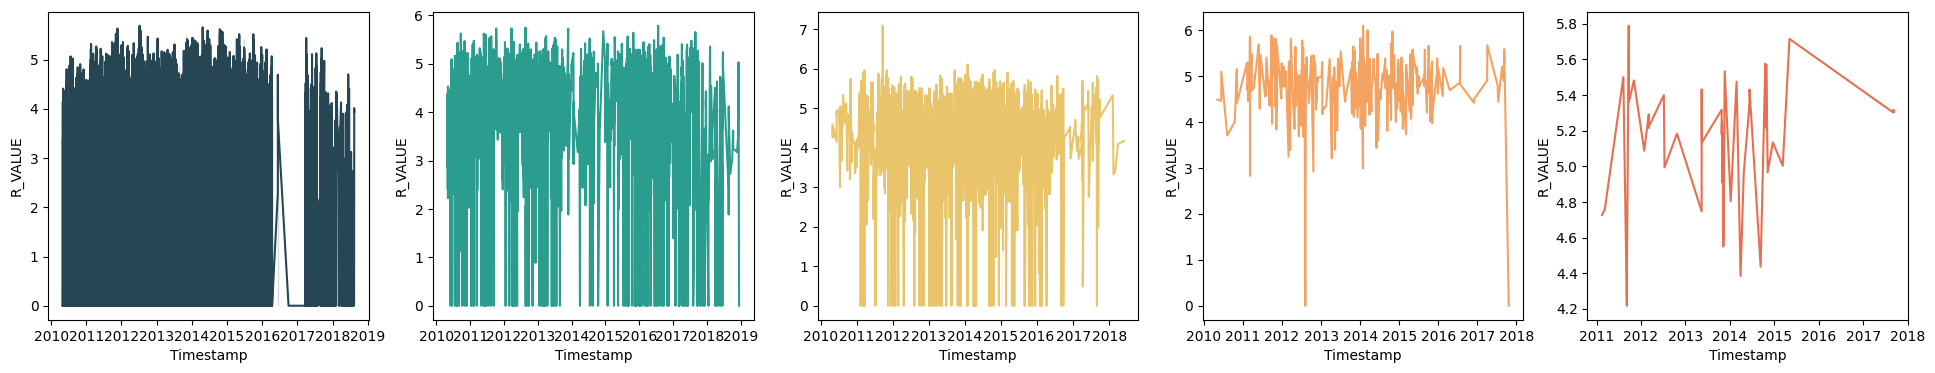

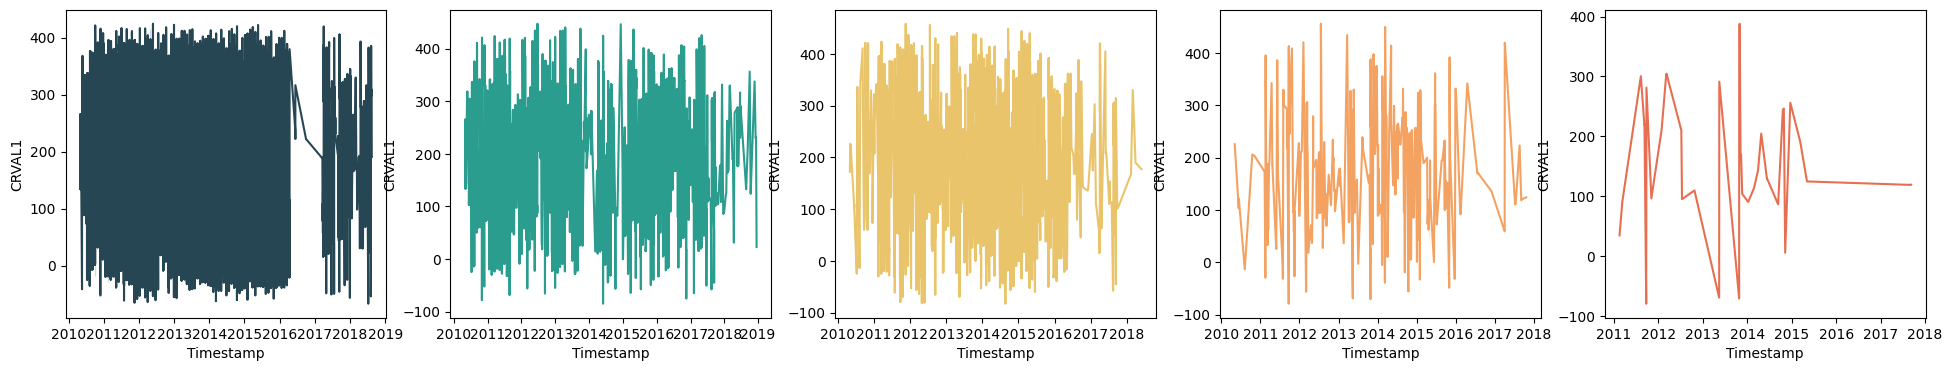

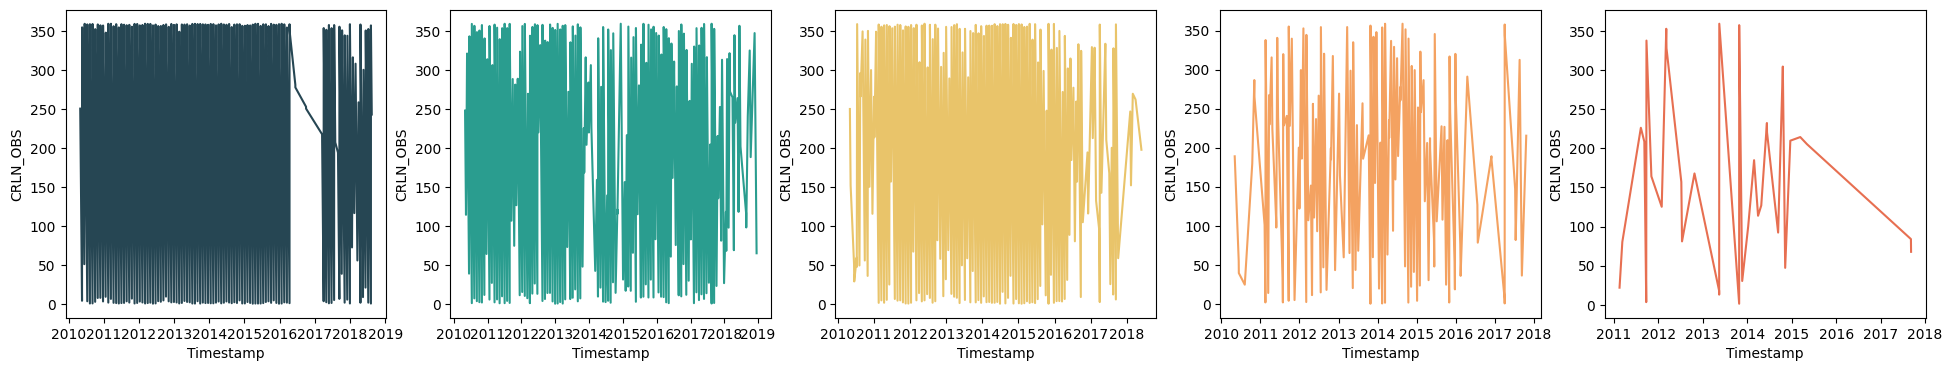

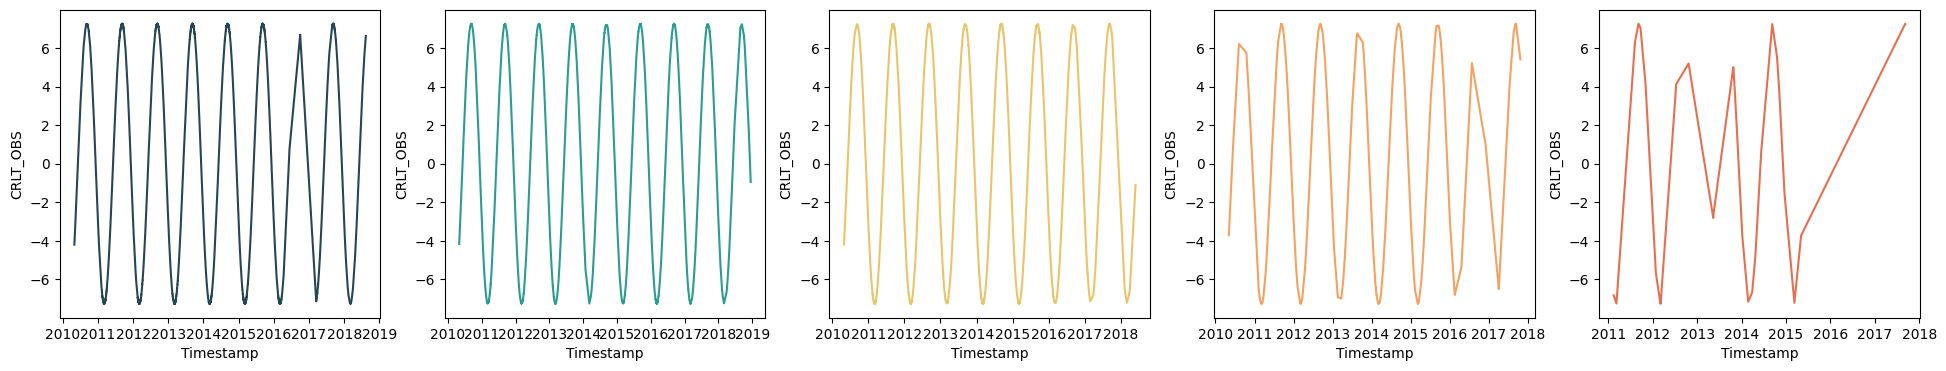

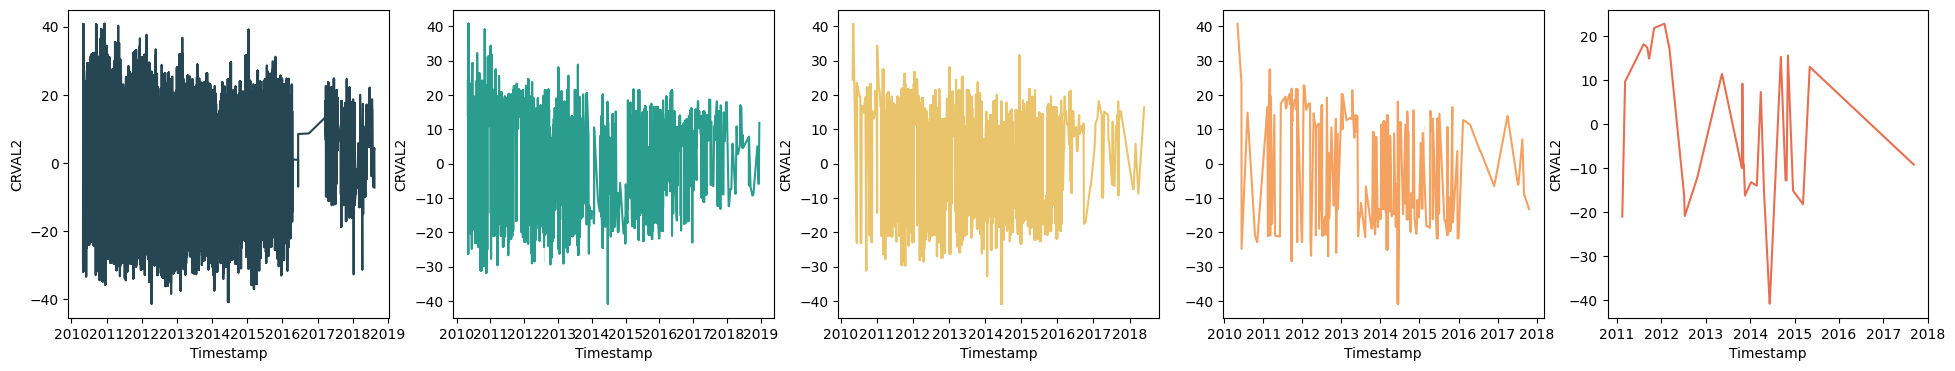

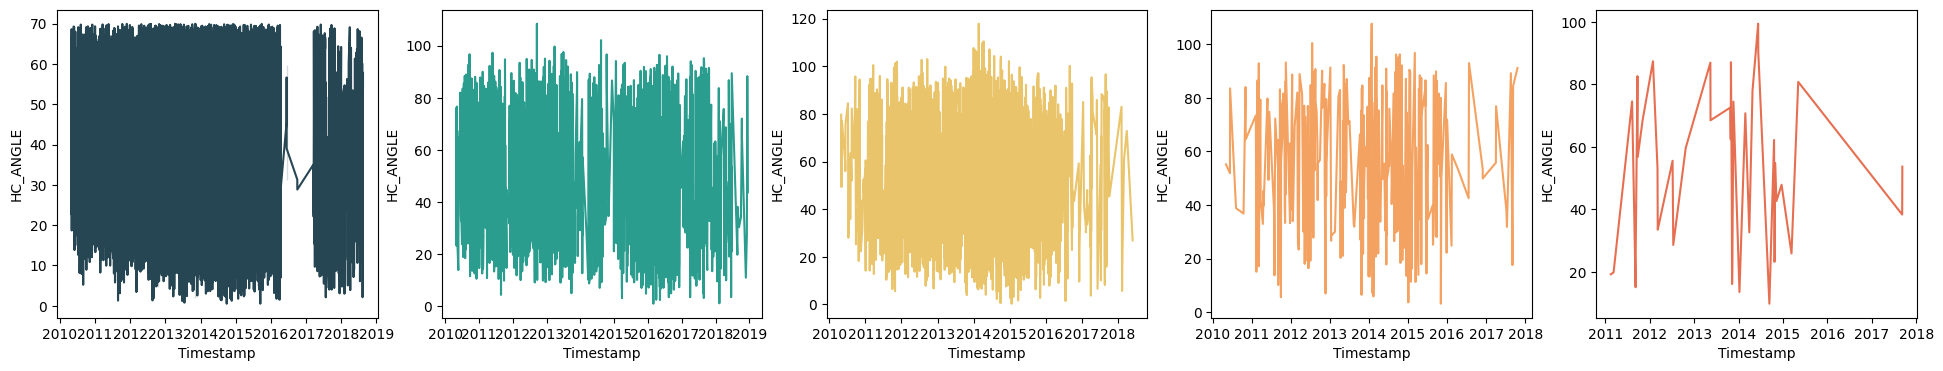

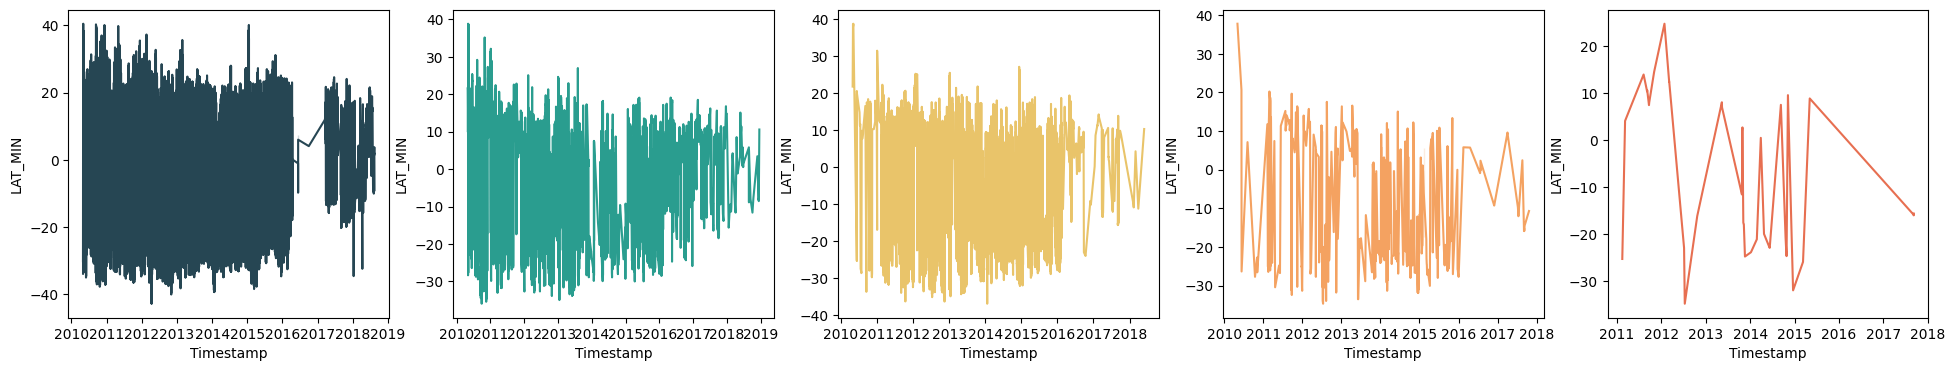

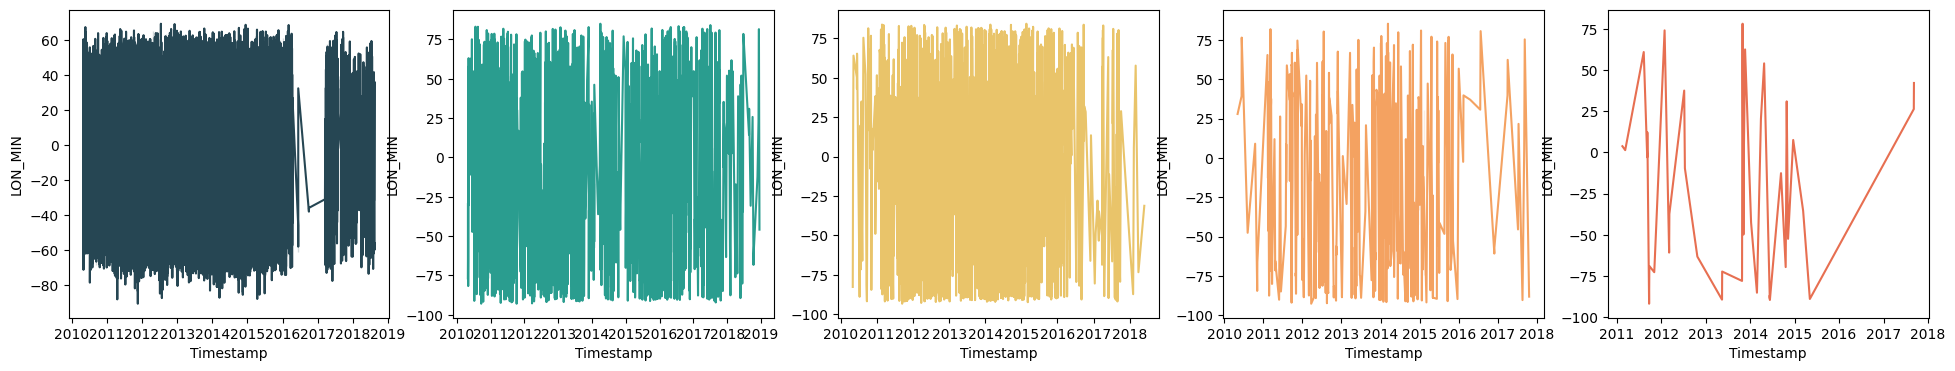

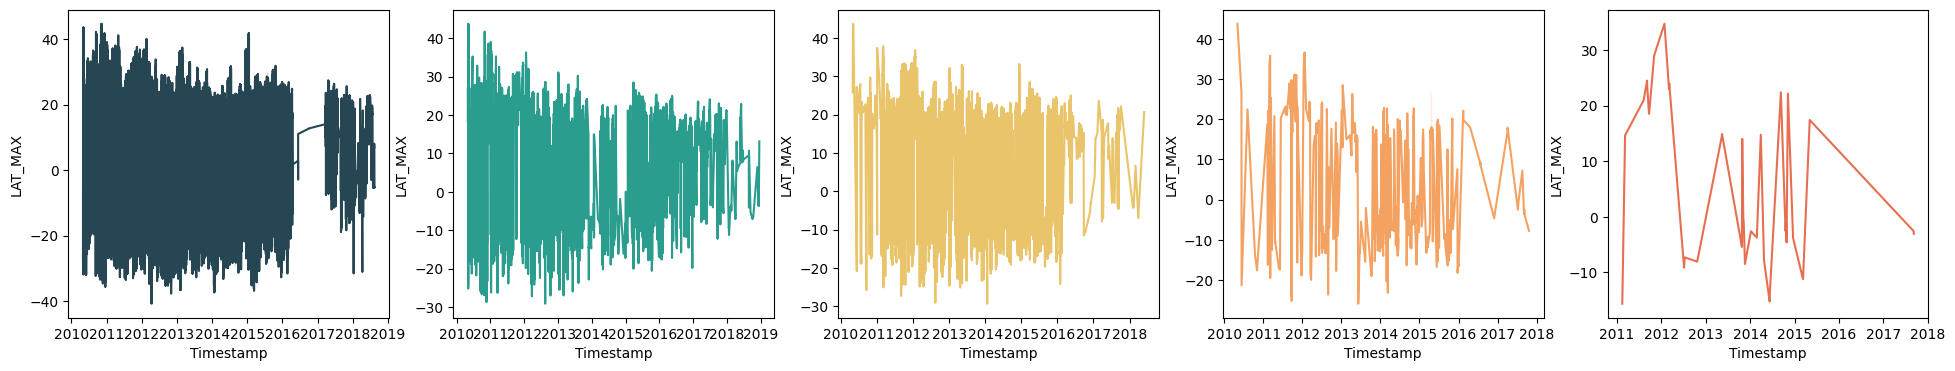

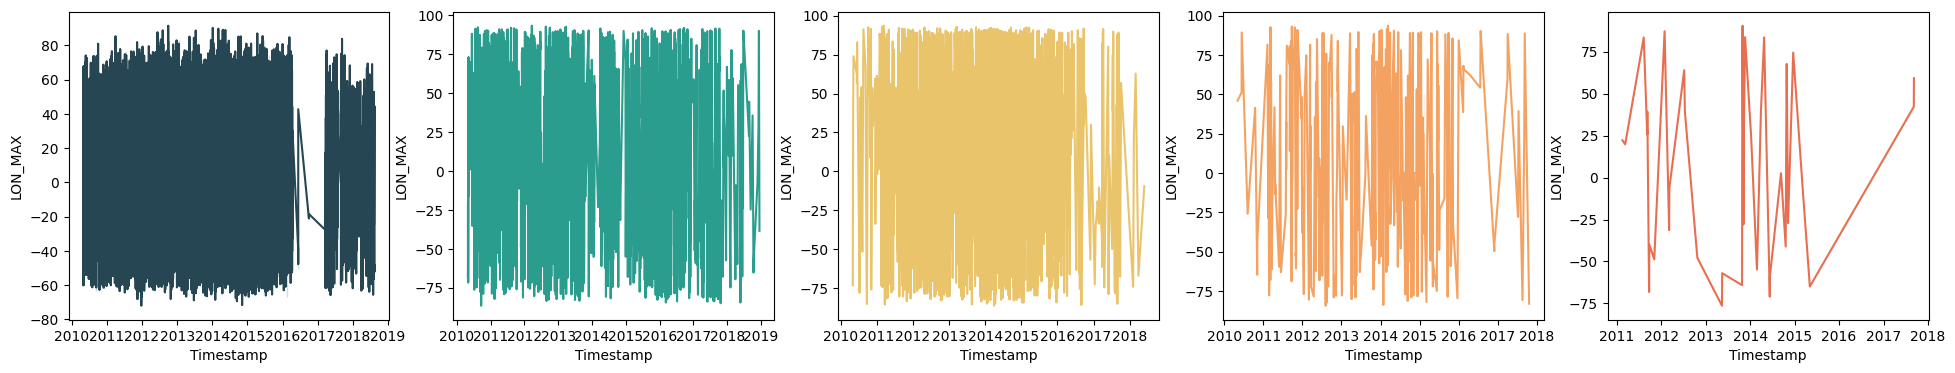

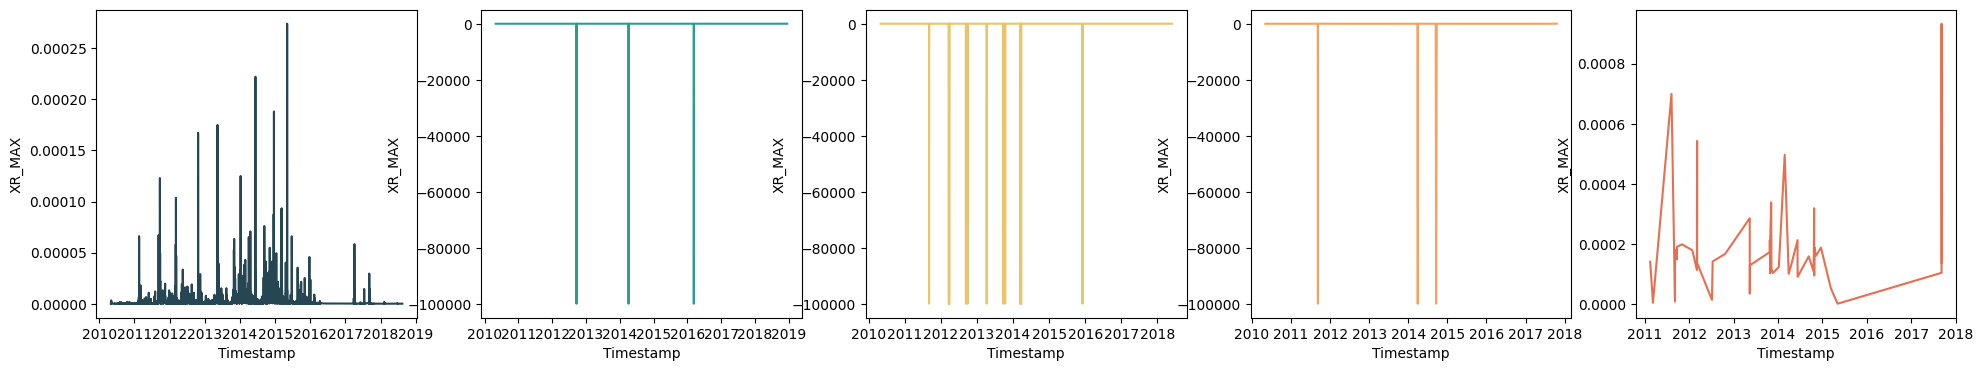

In [18]:
color = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
features = [
  'TOTUSJH', 'TOTBSQ',   'TOTPOT',   'TOTUSJZ', 'ABSNJZH',  'SAVNCPP', 'USFLUX',  'TOTFZ',
  'MEANPOT', 'EPSZ',     'MEANSHR',  'SHRGT45', 'MEANGAM',  'MEANGBT', 'MEANGBZ', 'MEANGBH',
  'MEANJZH', 'TOTFY',    'MEANJZD',  'MEANALP', 'TOTFX',    'EPSY',    'EPSX',    'R_VALUE',
  'CRVAL1',  'CRLN_OBS', 'CRLT_OBS', 'CRVAL2',  'HC_ANGLE', 'LAT_MIN', 'LON_MIN', 'LAT_MAX',
  'LON_MAX', 'XR_MAX'
]

for feature in features:
  fig, axs = plt.subplots(1, 5, figsize=(24, 4))
  for i in range(len(df.y.unique())):
    sns.lineplot(
      data=df[df.y==i],
      x='Timestamp',
      y=feature,
      ax=axs[i],
      color=color[i]
    )

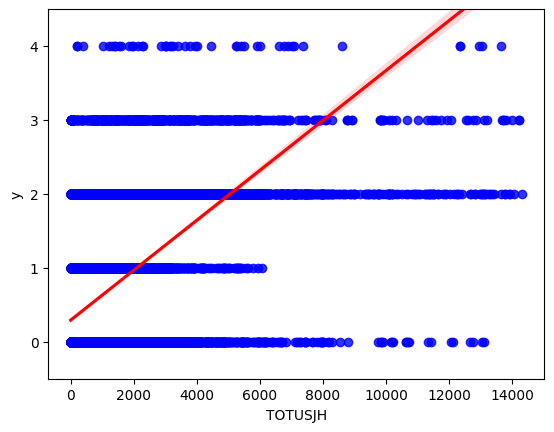

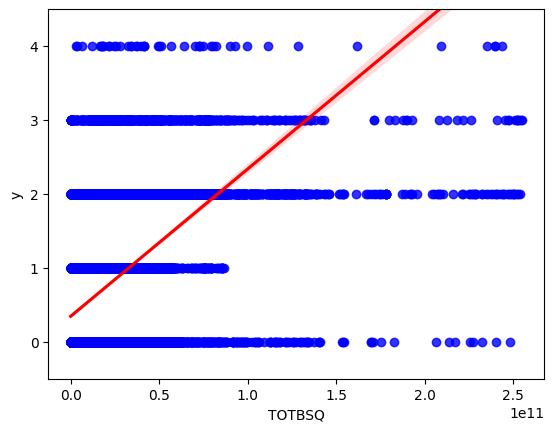

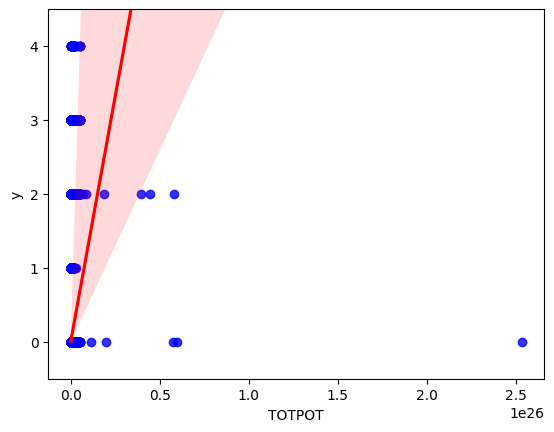

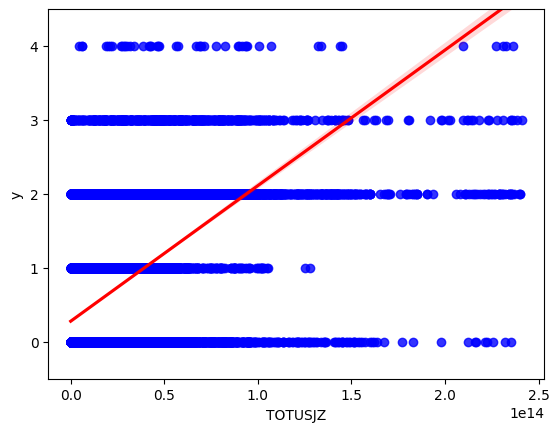

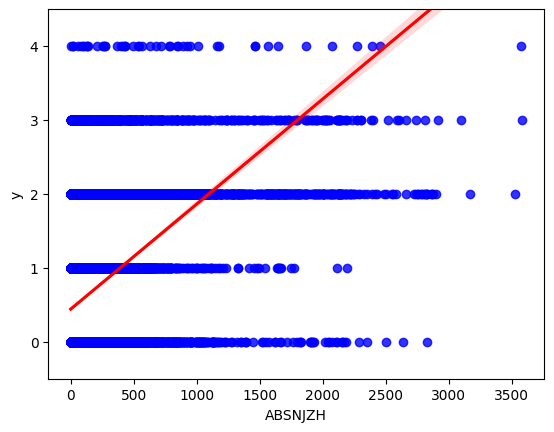

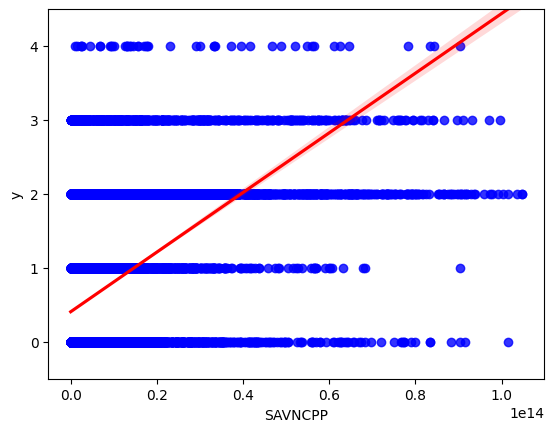

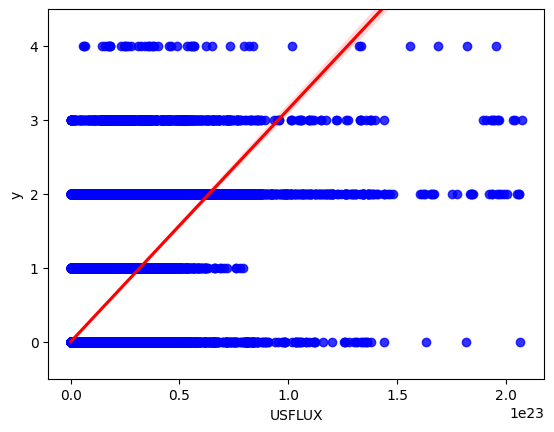

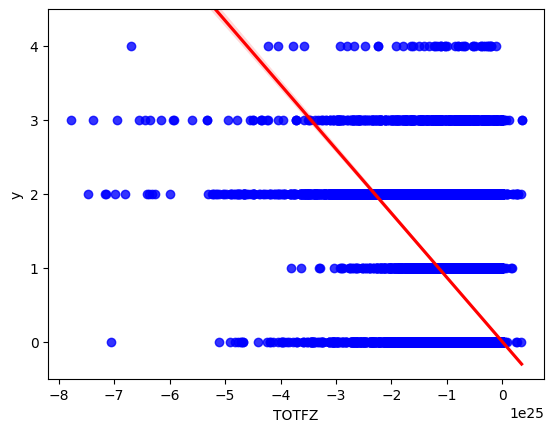

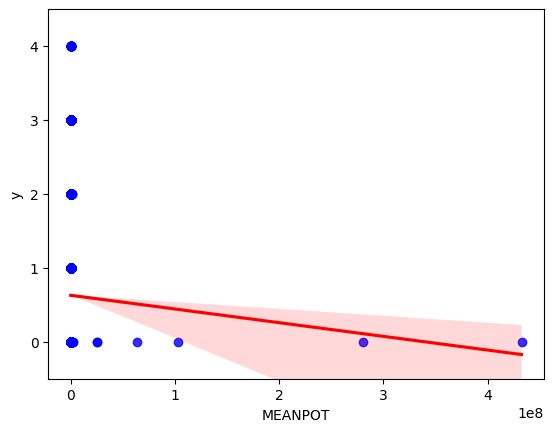

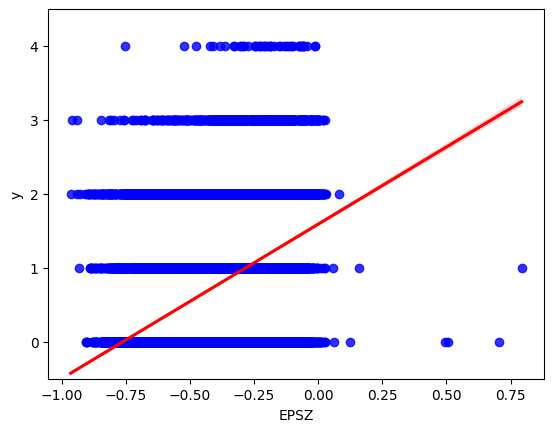

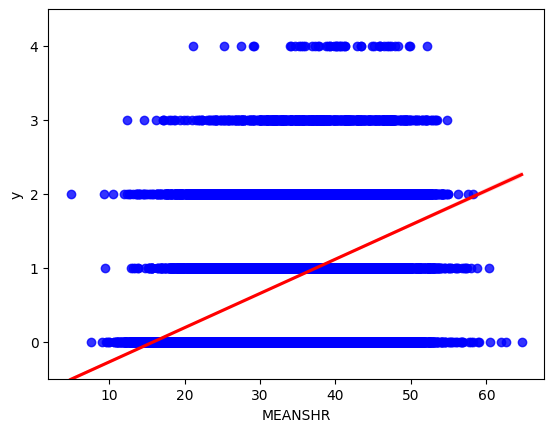

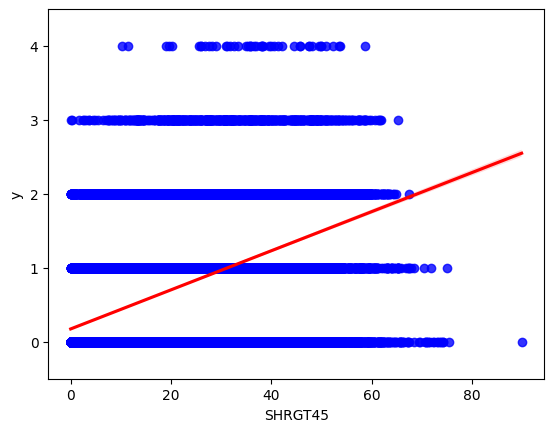

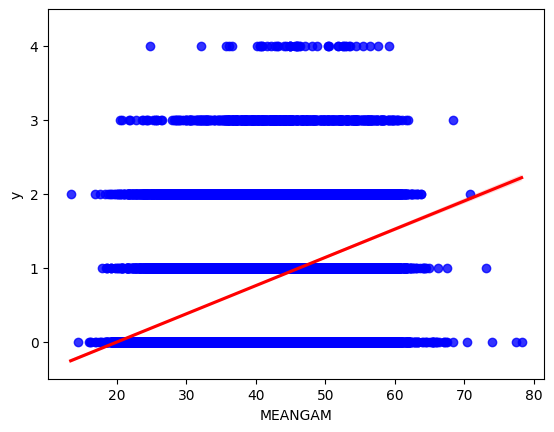

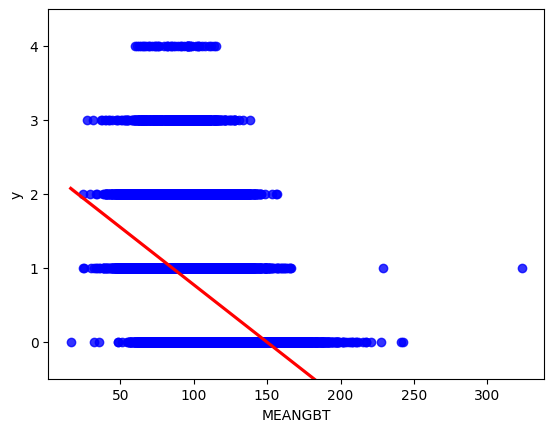

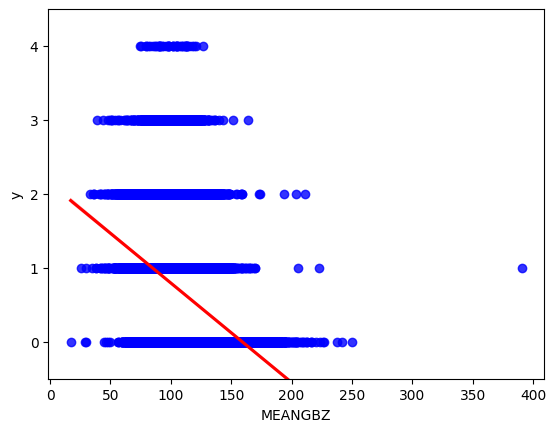

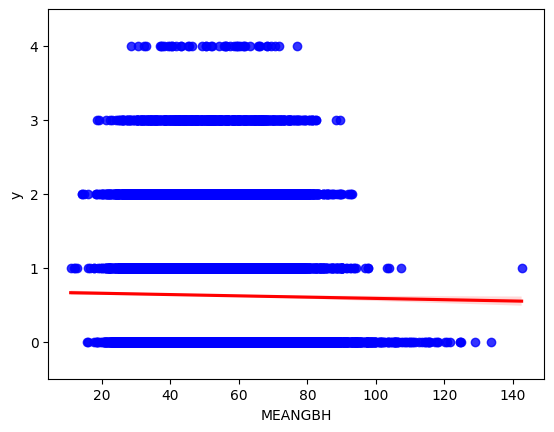

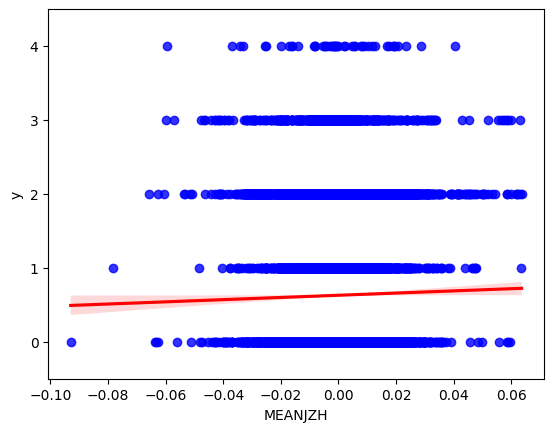

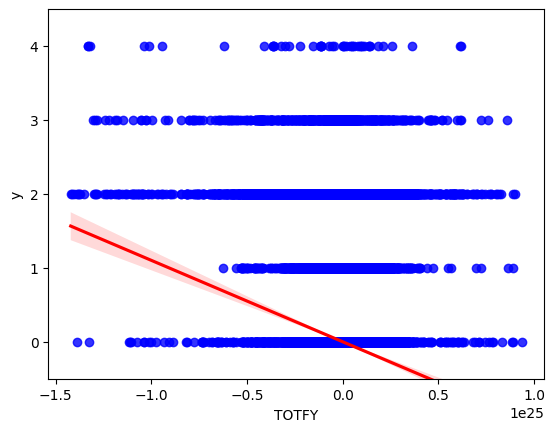

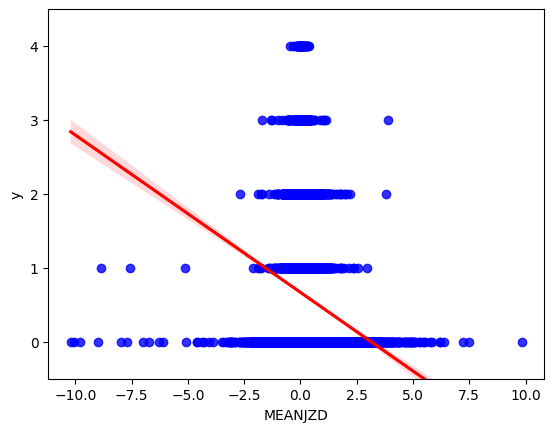

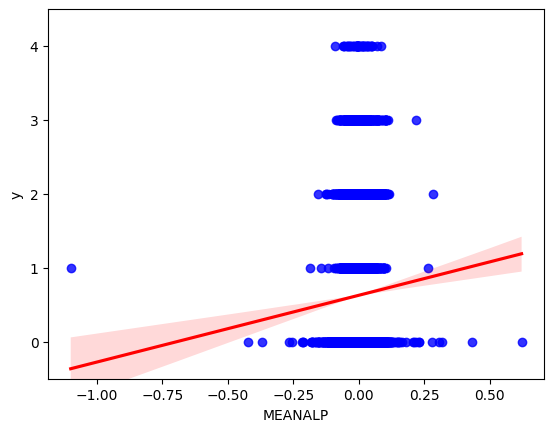

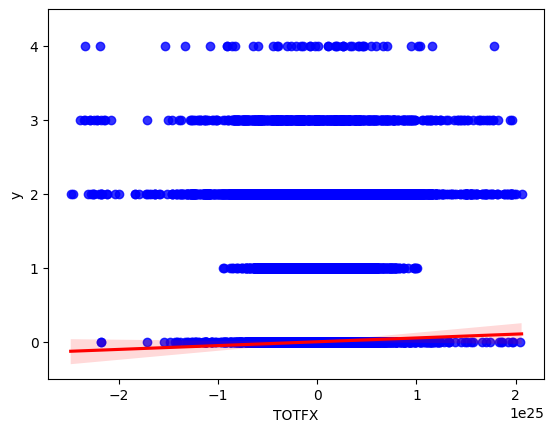

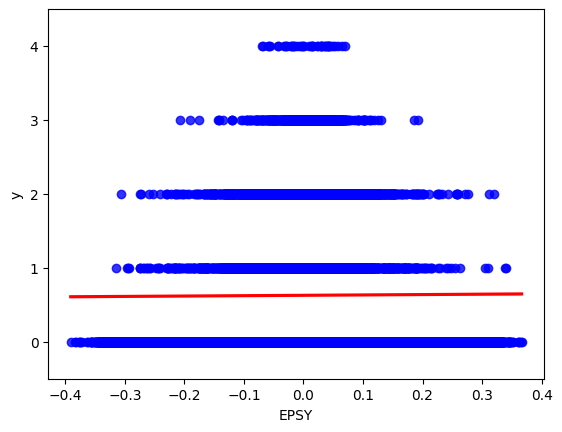

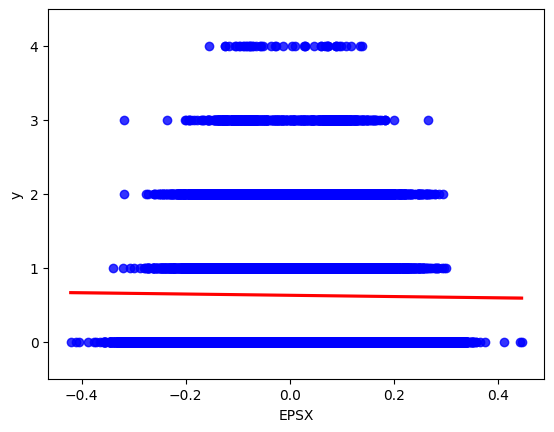

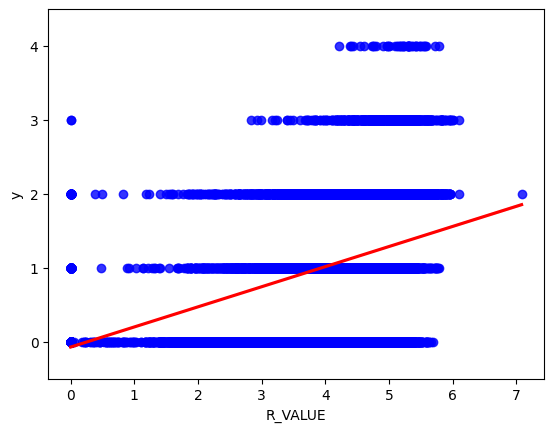

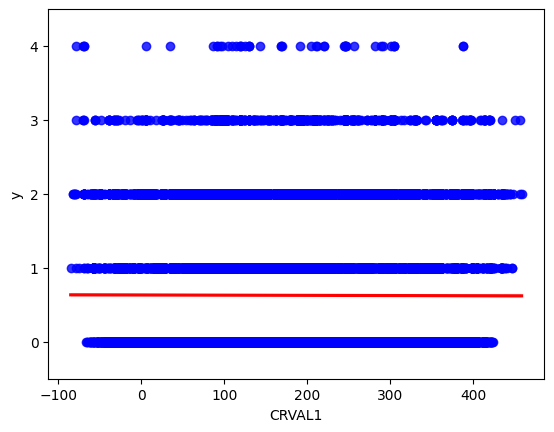

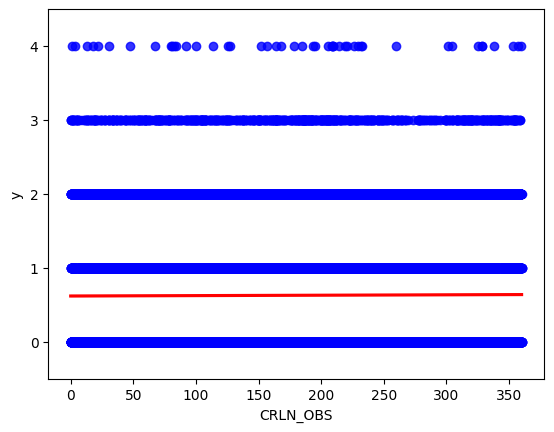

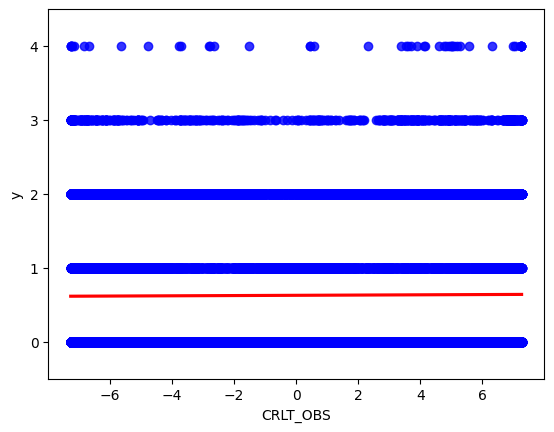

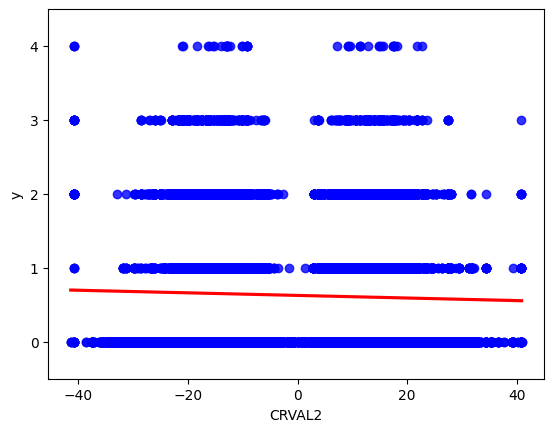

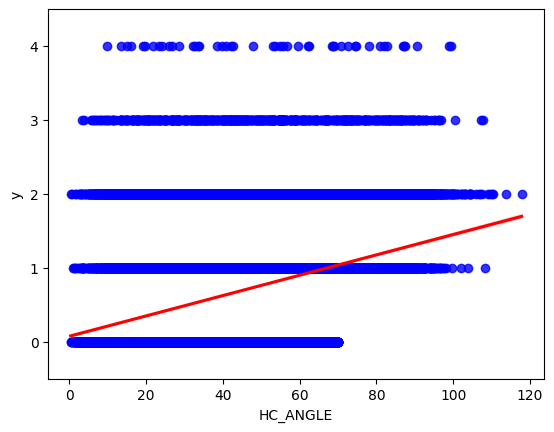

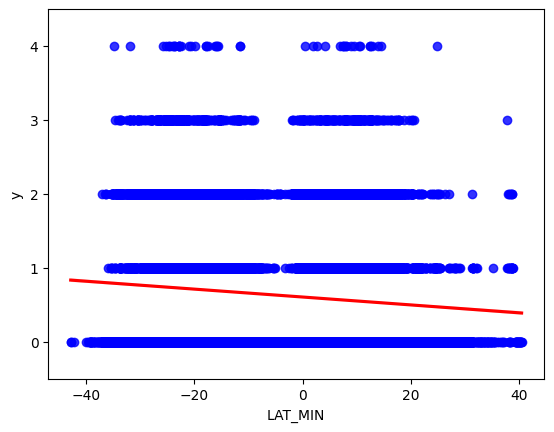

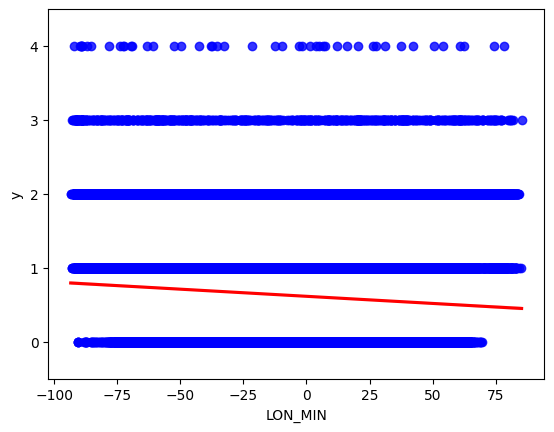

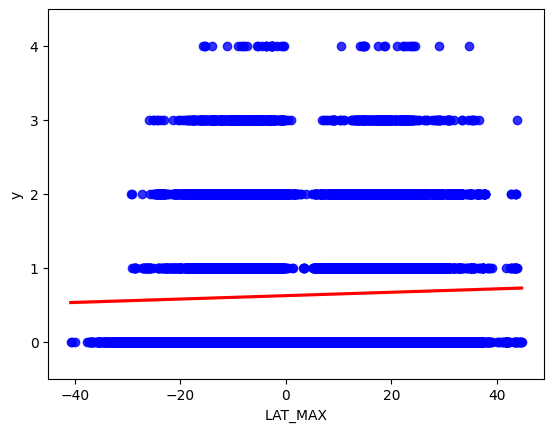

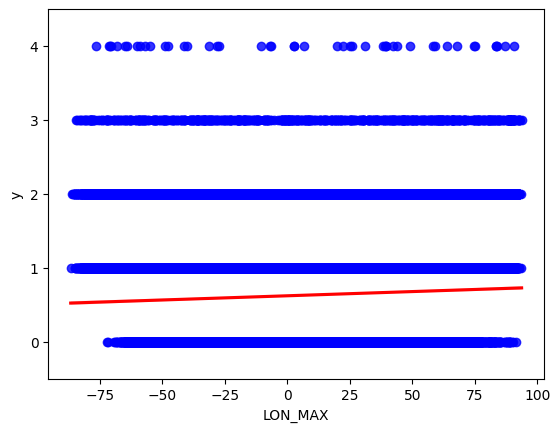

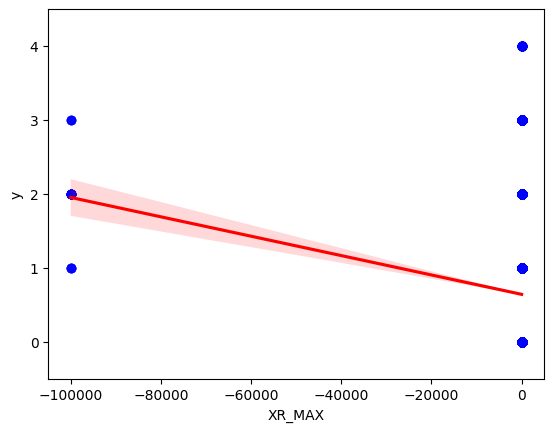

In [94]:
features = [
  'TOTUSJH', 'TOTBSQ',   'TOTPOT',   'TOTUSJZ', 'ABSNJZH',  'SAVNCPP', 'USFLUX',  'TOTFZ',
  'MEANPOT', 'EPSZ',     'MEANSHR',  'SHRGT45', 'MEANGAM',  'MEANGBT', 'MEANGBZ', 'MEANGBH',
  'MEANJZH', 'TOTFY',    'MEANJZD',  'MEANALP', 'TOTFX',    'EPSY',    'EPSX',    'R_VALUE',
  'CRVAL1',  'CRLN_OBS', 'CRLT_OBS', 'CRVAL2',  'HC_ANGLE', 'LAT_MIN', 'LON_MIN', 'LAT_MAX',
  'LON_MAX', 'XR_MAX'
]

for feature in features:
    sns.regplot(
      data=df,
      x=feature,
      y='y',
      scatter_kws={"color": "blue"},
      line_kws={"color": "red"}
    )
    plt.ylim(-0.5, 4.5)
    plt.show()
